#LDA
#it converts to lower dimensional data
#Difference betn lDA and PCA


 -both LDA and PCA are linear transformation techniques:
  LDA is a supervised whereas PCA is unsupervised – PCA ignores 
  class labels. We can picture PCA as a technique that finds the 
  directions of maximal variance: ... Remember that LDA makes assumptions 
  about normally distributed classes and equal class covariances.

# Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the Datasets

In [2]:
dataset = pd.read_csv('E:\\Edu\\Data Science and ML\\Machinelearningaz\\Datasets\\Part 9 - Dimensionality Reduction\\Section 44 - Linear Discriminant Analysis (LDA)\\Wine.csv')
dataset

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450,1
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290,1
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295,1
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045,1
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045,1


In [3]:
dataset.shape

(178, 14)

In [4]:
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [5]:
dataset.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [6]:
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

# Splitting Dataset into TrainingSet and TestSet

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [8]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[1.369e+01 3.260e+00 2.540e+00 ... 9.600e-01 1.820e+00 6.800e+02]
 [1.269e+01 1.530e+00 2.260e+00 ... 9.600e-01 2.060e+00 4.950e+02]
 [1.162e+01 1.990e+00 2.280e+00 ... 1.160e+00 2.960e+00 3.450e+02]
 ...
 [1.242e+01 1.610e+00 2.190e+00 ... 1.060e+00 2.960e+00 3.450e+02]
 [1.390e+01 1.680e+00 2.120e+00 ... 9.100e-01 3.330e+00 9.850e+02]
 [1.416e+01 2.510e+00 2.480e+00 ... 6.200e-01 1.710e+00 6.600e+02]]
[[1.374e+01 1.670e+00 2.250e+00 1.640e+01 1.180e+02 2.600e+00 2.900e+00
  2.100e-01 1.620e+00 5.850e+00 9.200e-01 3.200e+00 1.060e+03]
 [1.279e+01 2.670e+00 2.480e+00 2.200e+01 1.120e+02 1.480e+00 1.360e+00
  2.400e-01 1.260e+00 1.080e+01 4.800e-01 1.470e+00 4.800e+02]
 [1.237e+01 1.130e+00 2.160e+00 1.900e+01 8.700e+01 3.500e+00 3.100e+00
  1.900e-01 1.870e+00 4.450e+00 1.220e+00 2.870e+00 4.200e+02]
 [1.356e+01 1.730e+00 2.460e+00 2.050e+01 1.160e+02 2.960e+00 2.780e+00
  2.000e-01 2.450e+00 6.250e+00 9.800e-01 3.030e+00 1.120e+03]
 [1.305e+01 5.800e+00 2.130e+00 2.150e+01 8.600e+01 

In [9]:
#to predict which user going to buy SUV


# Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [9]:
X_train    # ytrain is not scaled because its categorical data

array([[ 0.87668336,  0.79842885,  0.64412971, ...,  0.0290166 ,
        -1.06412236, -0.2059076 ],
       [-0.36659076, -0.7581304 , -0.39779858, ...,  0.0290166 ,
        -0.73083231, -0.81704676],
       [-1.69689407, -0.34424759, -0.32337513, ...,  0.90197362,
         0.51900537, -1.31256499],
       ...,
       [-0.70227477, -0.68615078, -0.65828065, ...,  0.46549511,
         0.51900537, -1.31256499],
       [ 1.13777093, -0.62316862, -0.91876272, ..., -0.18922266,
         1.03282752,  0.80164614],
       [ 1.4610222 ,  0.12361993,  0.42085937, ..., -1.45501034,
        -1.2168803 , -0.2719767 ]])

# Applying LDA

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train,y_train)
X_test = lda.transform(X_test)
print(X_train)
print(X_test)


[[ 3.57315552  1.94018924]
 [ 0.85475898 -2.08182977]
 [ 0.62173655 -3.06234453]
 [ 4.80786412  2.00638739]
 [-3.8579759   0.14987256]
 [-3.59455458  1.24961706]
 [-0.53772906 -3.0852704 ]
 [ 0.04058577 -2.47312446]
 [ 0.99835348 -3.36989668]
 [-3.74095658  1.94844242]
 [ 3.76035226  0.82126218]
 [-0.15106412 -1.86820292]
 [ 3.62762899  2.05460026]
 [-3.94229781  2.80328429]
 [ 3.33429017  0.73627798]
 [ 3.90206871  1.03276135]
 [-3.55835472  0.18783108]
 [ 5.63175281  2.40524214]
 [-5.56217254  0.85694946]
 [ 0.23296188 -3.94615581]
 [ 5.03141997  3.23313754]
 [ 3.52861651  0.94605778]
 [-1.17815662 -2.17294825]
 [ 3.58320131  0.67947364]
 [ 5.21649905  2.41090952]
 [-3.01647841  1.24411621]
 [ 1.86178658 -0.47484926]
 [ 3.93816398 -0.2204059 ]
 [-1.0836235  -3.32496762]
 [ 1.8691488  -0.63362283]
 [ 3.27717205  1.51263542]
 [-0.47842302 -1.16766723]
 [-4.14433134  1.37391708]
 [ 2.45009727 -2.49336285]
 [-1.20844631 -2.30679956]
 [ 2.55631466 -0.98550214]
 [-1.6091476   0.55066705]
 

# Fitting  Logistic Regression to Training Set

In [14]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


C:\Users\Jakkani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Jakkani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# Predicting The Test set Results

In [15]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1], dtype=int64)

# Making Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  6]], dtype=int64)

In [18]:
#Accuracy
(100)*(14+16+6)/(14+16+6)

100.0

# Visualising the Training Set results

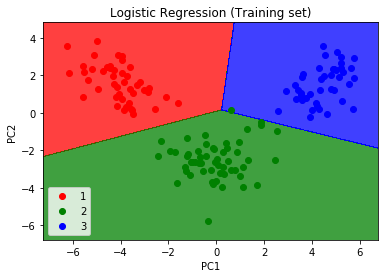

In [19]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

#red= who didnt buy SUV
#green= who bought the SUV

# Visualising the Test set results

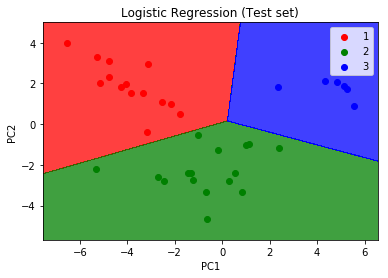

In [20]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()